# BBS669 GÖRÜNTÜ İŞLEME DERSİ
## PROJE 1
**Teslim tarihi:** 18.04.2021<br>
**Email:** aca.odev@gmail.com<br>
**Amaç:** Bu projede görüntü iyileştirme yöntemlerinden bazılarını verilen görüntüler üzerinde denemeniz beklenmektedir.

In [1]:
# klasör içindeki dosyalar
!dir /B

.ipynb_checkpoints
MertGul_Project1.ipynb
project1.pdf
soru1-chest.tif
soru1-lena.bmp
soru1-pepper.bmp
soru2-fingerprint.tif
soru3-ocr.tif


Aşağıda, <br>
1) Kullanacağımız kütüphaneleri yüklüyor,<br>
2) Proje dosya isimlerini bir listede topluyor,<br>
3) Resim dosyalarını ve boyutlarını görsel amaçlı ekrana bastırıyoruz.<br>

In [2]:
import cv2             # "opencv" library
import numpy as np     # "numpy" library for n dimensional array hangling
from PIL import Image  # "Pillow" library for save/open/show images
import matplotlib.pyplot as plt  # 'matplotlib' lib. for img arragements

In [3]:
project1_imgs = ["soru1-chest.tif", 
                "soru1-lena.bmp", 
                "soru1-pepper.bmp", 
                "soru2-fingerprint.tif", 
                "soru3-ocr.tif"]

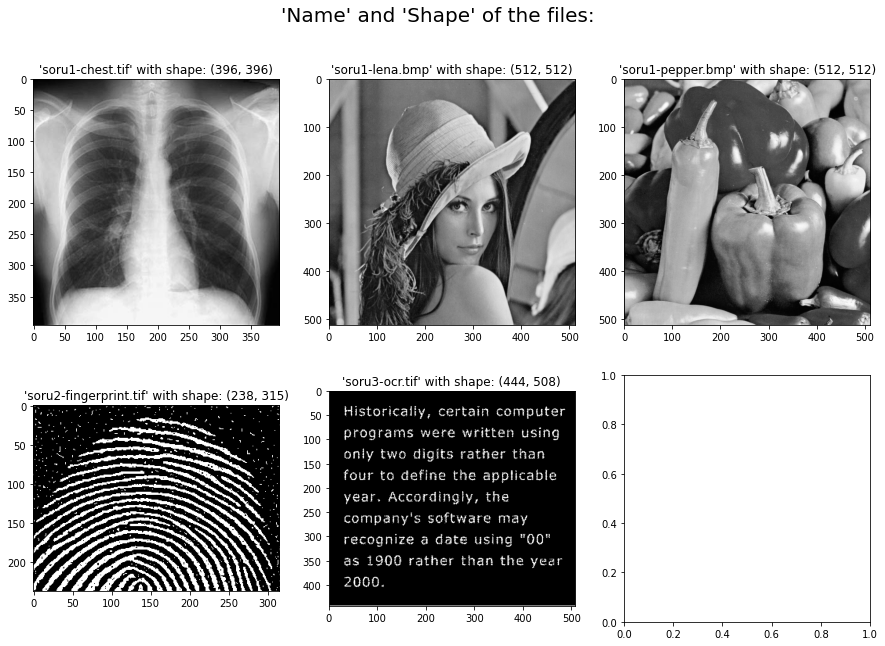

In [4]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
plt.suptitle("'Name' and 'Shape' of the files:", size=20)
for i in range(5):
    img = cv2.imread(project1_imgs[i], 0)
    h, w = (i//3, i%3)  # height, width coordinates
    ax[h][w].title.set_text(f"'{project1_imgs[i]}' with shape: {img.shape}")
    ax[h][w].imshow(img, cmap="gray")
# plt.tight_layout()

***
### Soru 1: 
**(40 puan) Aşağıdaki verilen üç görüntünün kontrast değerleri düşüktür. Bu görüntülerin kontrast değerlerini iyileştirmek için sırasıyla aşağıdaki adımları uygulayın.**

İlk olarak görüntüleri birer değişkene atıyoruz.

In [5]:
chest = cv2.imread(project1_imgs[0], 0)  # "soru1-chest.tif"
lena = cv2.imread(project1_imgs[1], 0)   # "soru1-lena.bmp"
pepper = cv2.imread(project1_imgs[2], 0) # "soru1-pepper.bmp"

**a. Bu görüntülerin mevcut halleri için histogramlarını elde edin.**

1\. soru resimlerinin histogramlarını ve CDF (cumulative distribution) fonksiyonunu aynı grafikte gösterelim. Histogram equalization adımından sonra yapılan iyileştirmelerin ardından histogramların daha homojen bir şekilde yayılmasını, CDF fonksiyonunun da linear olarak _(neredeyse y = x doğrusu gibi)_ düzelmesini gözlemleyeceğiz.<br>

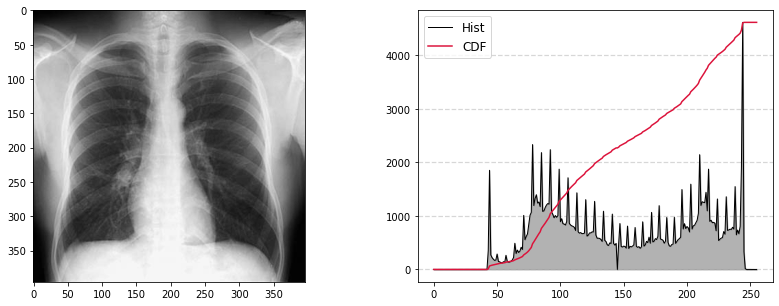

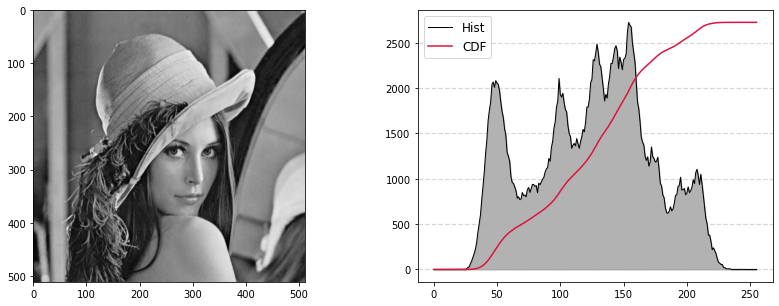

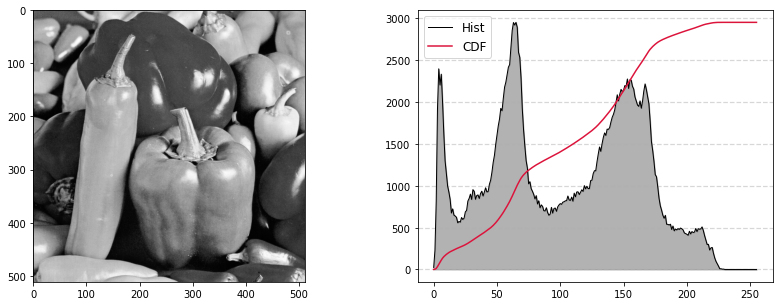

In [6]:
def soru1(img_list):
    for img in img_list:
        # let's create a base figure:
        plt.figure(figsize=(14, 5))
        plt.subplot(121)
        # current image:
        plt.imshow(img, cmap="gray")
        plt.subplot(122)
        # calculate and plot histogram:
        hist = cv2.calcHist(images=[img], 
                            channels=[0], # only b&w
                            mask=None, 
                            histSize=[256], 
                            ranges=[0, 256])
        plt.plot(hist, color="black", linewidth=1)
        # calculate and plot cumulative distribution function:
        cdf = hist.cumsum()
        cdf = cdf * (hist.max() / cdf.max())  # normalized cdf to fit the graph
        plt.plot(cdf, color="crimson")
        # cosmetic changes:
        plt.grid(axis="y", alpha=0.5, linewidth=1.25, linestyle="--")
        plt.fill_between(x=range(256), y1=hist.ravel(), color="gray", alpha=0.60)
        plt.legend(("Hist", "CDF"), loc="upper left", fontsize="large")
        plt.show()

soru1([chest, lena, pepper])

**b. Görüntülere contrast streching uygulayın ve yeni görüntüyle birlikte histogramını elde edin. Contrast streching için minimum ve maksimum piksel değerlerini en düşük %1 ve en yüksek %1’lik dilimden seçin. Yani en düşük %1’lik pikseli ve en yüksek %1’lik pikselleri ihmal ederek, minimum ve maksimum değerlerini bulun.**

Histogramları da değişkenlere atayarak %1'lik kısımları ihmal ederek alt ve üst sınır değerlerini güncelleyelim.

In [7]:
# the histograms of the images:
chest_hist = cv2.calcHist(images=[chest], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
lena_hist = cv2.calcHist(images=[lena], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
pepper_hist = cv2.calcHist(images=[pepper], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

---

In [8]:
# first and last 1% of CHEST image
print("First %1:", np.squeeze(np.sort(chest_hist, axis=0)[0:(256//100)+1]))
print("Last %1:", np.squeeze(np.sort(chest_hist, axis=0)[-(256//100)-1:]))

First %1: [0. 0. 0.]
Last %1: [2238. 2333. 4616.]


In [9]:
# update the last 2 integers
chest_hist= np.where(chest_hist>2238.0, 2238.0, chest_hist)

***

In [10]:
# first and last 1% of LENA image
print("First %1:", np.squeeze(np.sort(lena_hist, axis=0)[0:(256//100)+1]))
print("Last %1:", np.squeeze(np.sort(lena_hist, axis=0)[-(256//100)-1:]))

First %1: [0. 0. 0.]
Last %1: [2673. 2690. 2723.]


In [11]:
# update the last 2 integers
lena_hist= np.where(lena_hist>2673.0, 2673.0, lena_hist)

***

In [12]:
# first and last 1% of PEPPER image
print("First %1:", np.squeeze(np.sort(pepper_hist, axis=0)[0:(256//100)+1]))
print("Last %1:", np.squeeze(np.sort(pepper_hist, axis=0)[-(256//100)-1:]))

First %1: [0. 0. 0.]
Last %1: [2918. 2948. 2950.]


In [13]:
# update the last 2 integers
pepper_hist= np.where(pepper_hist>2918.0, 2918.0, pepper_hist)

**c. Görüntülere histogram equalization uygulayın. İyileştirilmiş görüntü ve histogramını elde edin.**

Histogram equalization formulü:

$\large h(v) = round\bigg(\frac{cdf(v) \space-\space cdf_{min}}{cdf_{max} \space-\space cdf_{min}} \space\times\space (L-1)\bigg)$

In [14]:
img_and_hist = zip([chest, lena, pepper], 
                   [chest_hist, lena_hist, pepper_hist])
equalized_list = []

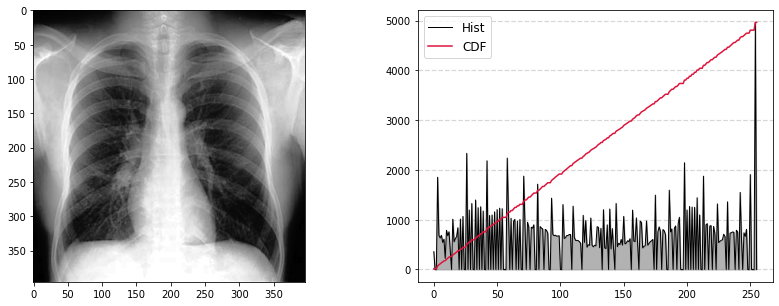

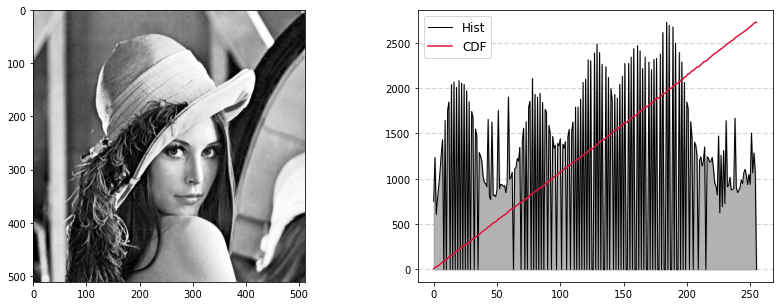

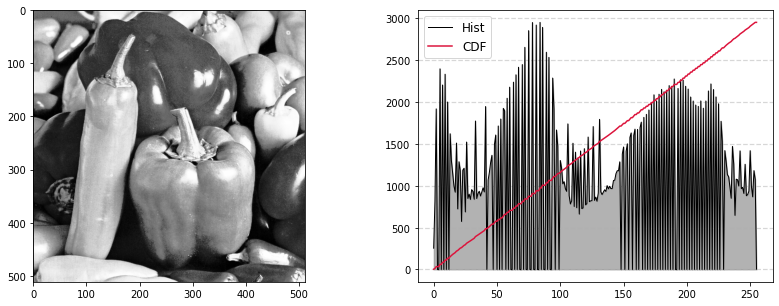

In [15]:
for img, hist in img_and_hist:
    cdf = hist.cumsum()
    # mask the zero values:
    cdf_mask = np.ma.masked_equal(cdf,0.)
    # normalize the cdf to [0,255]:
    cdf_mask = 255 * (cdf_mask - cdf_mask.min())/(cdf_mask.max() - cdf_mask.min())
    # convert the numbers to 8 bit unsigned int:
    cdf = np.ma.filled(cdf_mask,0).astype('uint8')
    # apply the equalization to the image:
    img_equalized = cdf[img]
    # add it to the list:
    equalized_list.append(img_equalized)
    
soru1(equalized_list)

**Sonuç:** Her ne kadar biber resmi kontrastı zaten iyi olsa da ışıklandırma bakımından daha eşit bir dağılıma kavuşmuştur. Lena ve -özellikle de- göğüs filmi resimlerinde kontrast düzelmesi çok daha belirgindir. Aşağıda, örnek olarak göğüs taraması filmi resimleri (öncesi ve sonrası) gösterilmiştir.

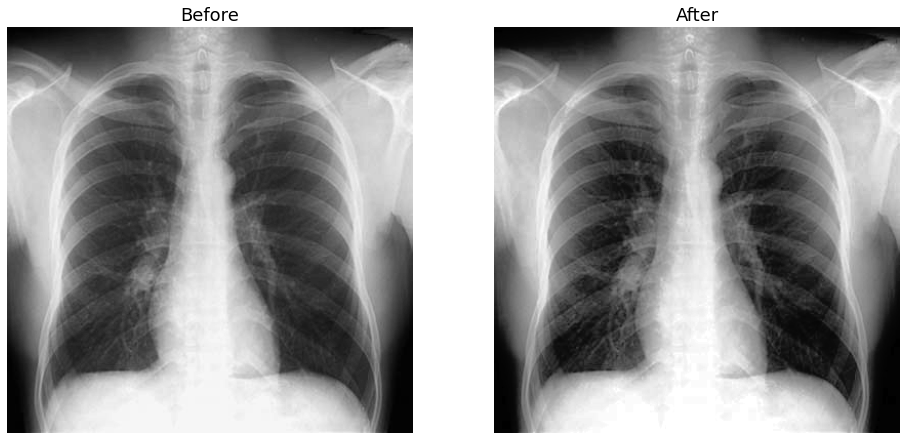

In [16]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Before", size=18)
plt.imshow(chest, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.title("After", size=18)
plt.imshow(equalized_list[0], cmap="gray")
plt.axis("off")
plt.show()

### Soru 2:
**(30 puan) Aşağıdaki parmak izi görüntüsünde siyah üstünde beyaz, beyaz üstünde siyah gürültüler bulunmaktadır. Bu gürültüleri tamamen kaldıracak filtreyi ve boyutlarını bularak, farklı boyutlardaki filtrelerin görüntüye etkisini gösterin.**

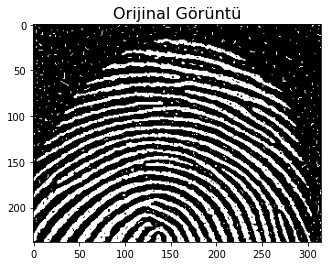

In [17]:
fingerprint = cv2.imread(project1_imgs[3], -1) # "soru2-fingerprint.tif"
plt.title("Orijinal Görüntü", size=16)
plt.imshow(fingerprint, cmap="binary_r");

Görüntüde açıkça "salt and pepper" gürültüsünün olduğunu görebiliyoruz ki bu, her bir gürültü değerinin aslında bir aşırı değer _(düşük piksel değerleri (siyah) içindeki yüksek (beyaz) değerler, ve tam tersi)_ olduğunu söylemektedir. Bunun için en uygun filtre, median filtredir çünkü bahsedilen piksel değerlerini sıraladığımız zaman, uç değerler başta ya da sonda yer alacaktır. Median filtre ise, belirlediğimiz kernel matrisini resim üzerinde gezdirecek ve merkezdeki piksel değerlerini bu orta (median) değeri ile değiştirecektir. Dolayısıyla aşırı değerler de elenmiş olacaktır. Ayrıca median filtre, görüntüdeki kenarları daha iyi koruyacak, Gaussian filtre gibi bulanıklaştırmayacaktır. Bu da görüntü işleme problemlerinde, öndeki objeyi arka plandan (kenar ayrımı ile) seçerken ya da yol çizgilerini takip ederken kolaylık sağlayacaktır.

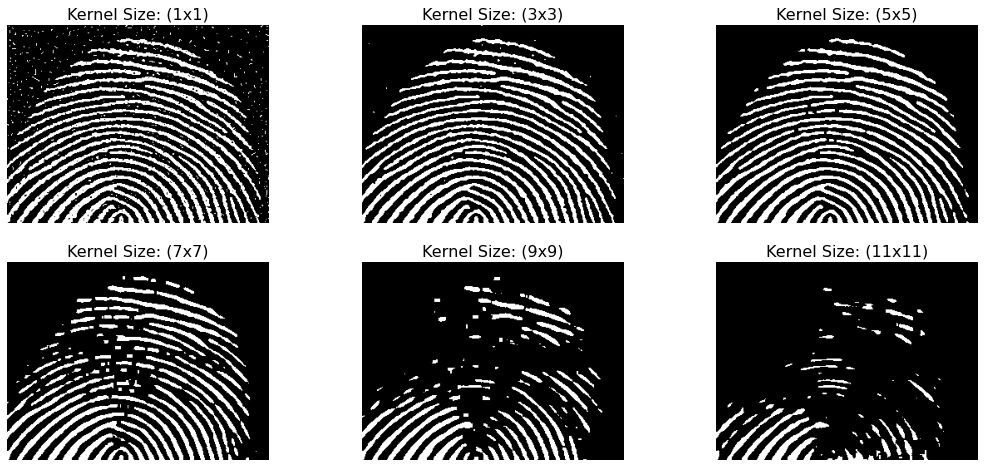

In [18]:
fingerprint = cv2.imread(project1_imgs[3], -1) # "soru2-fingerprint.tif"
frame_count = 1
plt.figure(figsize=(18, 8))
for kernel in range(1, 13, 2):
    plt.subplot(2,3,frame_count)
    plt.title(f"Kernel Size: ({kernel}x{kernel})", size=16)
    plt.imshow(cv2.medianBlur(fingerprint, kernel), cmap="binary_r")
    plt.axis("off")
    frame_count += 1
plt.show()
del frame_count

En uygun kernel boyutunun (3x3) ya da (5x5) olduğunu resimlerdeki gürültü seviyesinden anlayabiliriz. (3x3) kernelde çok az miktarda gürültü varken, (5x5) boyutundaki kernelde ise parmak izi çizgilerinde küçük miktarda kayıplar gözlemlenmeye başlamıştır. Dolayısıyla problem tanımı, performans durumu ve uygulama alanına göre iki kernelden birisi seçilebilir. (5x5) üstü kernellerde yüksek miktarda veri kaybı mevcuttur.

### Soru 3:
**(30 puan) Aşağıdaki karakter tanıma için kullanılabilecek görüntüde bazı karakterlerde kopukluklar bulunmaktadır. Ortalama (averaging) filtre ve eşikleme (thresholding) kullanarak bu kopuklukları tamir etmek mümkündür. Bu işlemleri sırasıyla yaparak, elde edilen iyileştirilmiş görüntüyü elde edin. Kullanılan filtre ve eşik değerlerini belirleyin.**

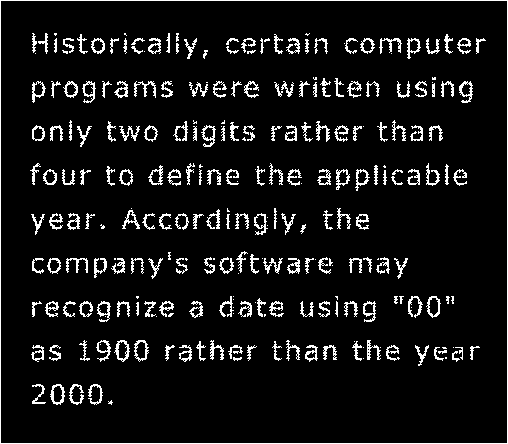

In [19]:
ocr = cv2.imread(project1_imgs[4], -1) # "soru3-ocr.tif"
Image.fromarray(ocr)  # Orijinal görüntü

Soruda belirtildiği gibi, öncelikle uygun bir "blur" seviyesiyle karakterlerdeki kopuklukları giderecek, ardından thresholding yaparak görüntüdeki bulanıklaştırma ile gelen gürültüleri temizleyeceğiz. Aşağıda, _averaging kernel_ olarak resmimiz üzerinde gezdireceğimiz _(convolution)_ örnek bir "box filter" gösterilmiştir.<br>

$K_{average} = \large\frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

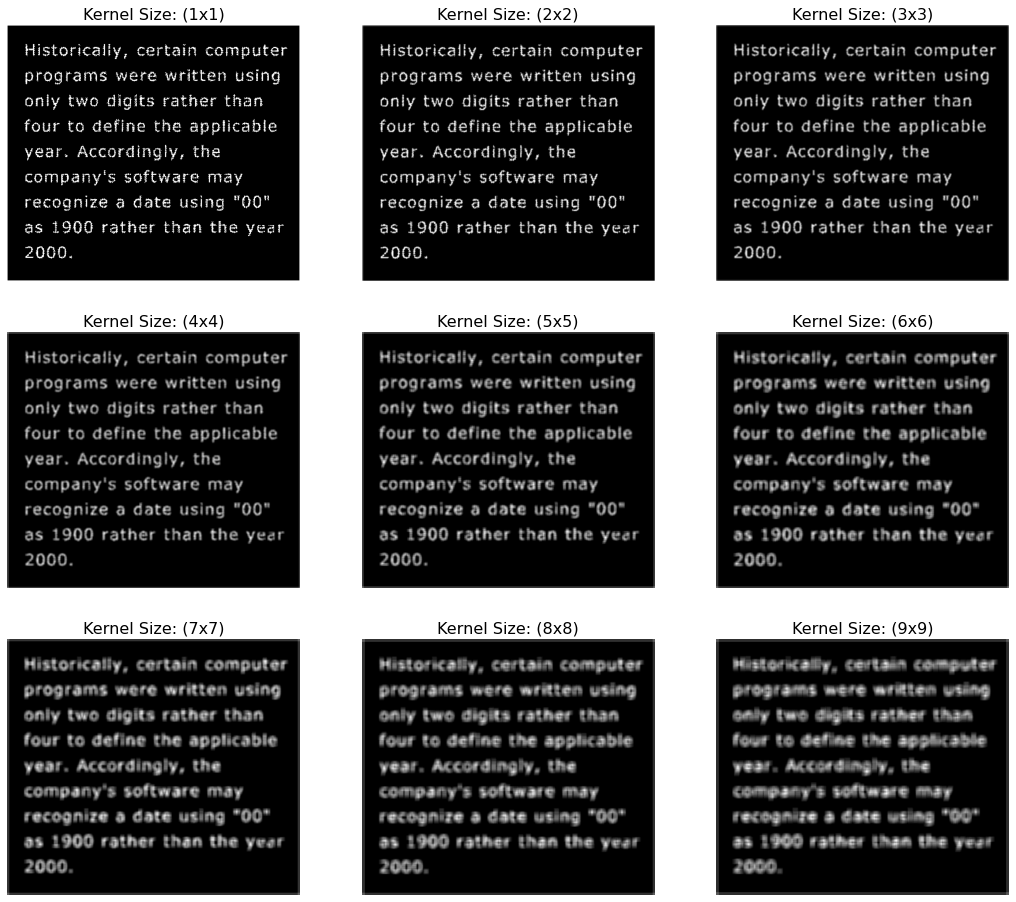

In [20]:
average_function = lambda kernel_size: np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)

plt.figure(figsize=(18, 16))
for k in range(1, 10):
    plt.subplot(3,3,k)
    plt.title(f"Kernel Size: ({k}x{k})", size=16)
    ocr_averaged = cv2.filter2D(src=ocr,  # "soru3-ocr.tif" image
                                ddepth=-1,  # when -1, the output image will have the same depth as the source.
                                kernel=average_function(k))  # averaging kernel
    plt.imshow(ocr_averaged, cmap="binary_r")
    plt.axis("off")
plt.show()
del ocr_averaged

(2x2), (3x3) veya -zorlarsak- (4x4) averaging, "okunabilirlik/karakter onarım" dengesini en iyi şekilde tutturan kernel'ler olarak alınabilir. Şimdi yalnızca (4x4)'ü örnek olarak alarak resim üzerinde "Otsu thresholding" uygulayalım ve sonrasında kodu bir fonksiyona dökerek bu üç -veya daha fazla- resim üzerine uygulayalım.

Note that, optimal global threshold determined from the image histograms.
Otsu threshold value of 'ocr_averaged_4': 48


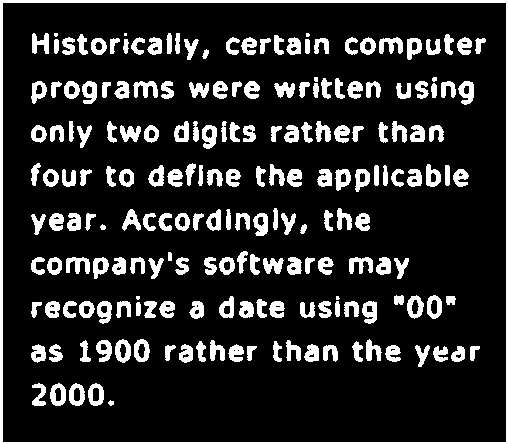

In [21]:
# average filter with (2x2) kernel on "ocr" image
ocr_averaged_4 = cv2.filter2D(src=ocr, ddepth=-1, kernel=average_function(4))

# Otsu thresholding on the img "ocr_averaged_4"
ret4, ocr_4 = cv2.threshold(src=ocr_averaged_4, # our averaged 'ocr' image
                            thresh=127, # some random initializer
                            maxval=255, # maximum pixel value
                            type=cv2.THRESH_OTSU,  # thresholding type
                           )
print("Note that, optimal global threshold determined from the image histograms.")
print("Otsu threshold value of 'ocr_averaged_4':", int(ret4))
Image.fromarray(ocr_4)

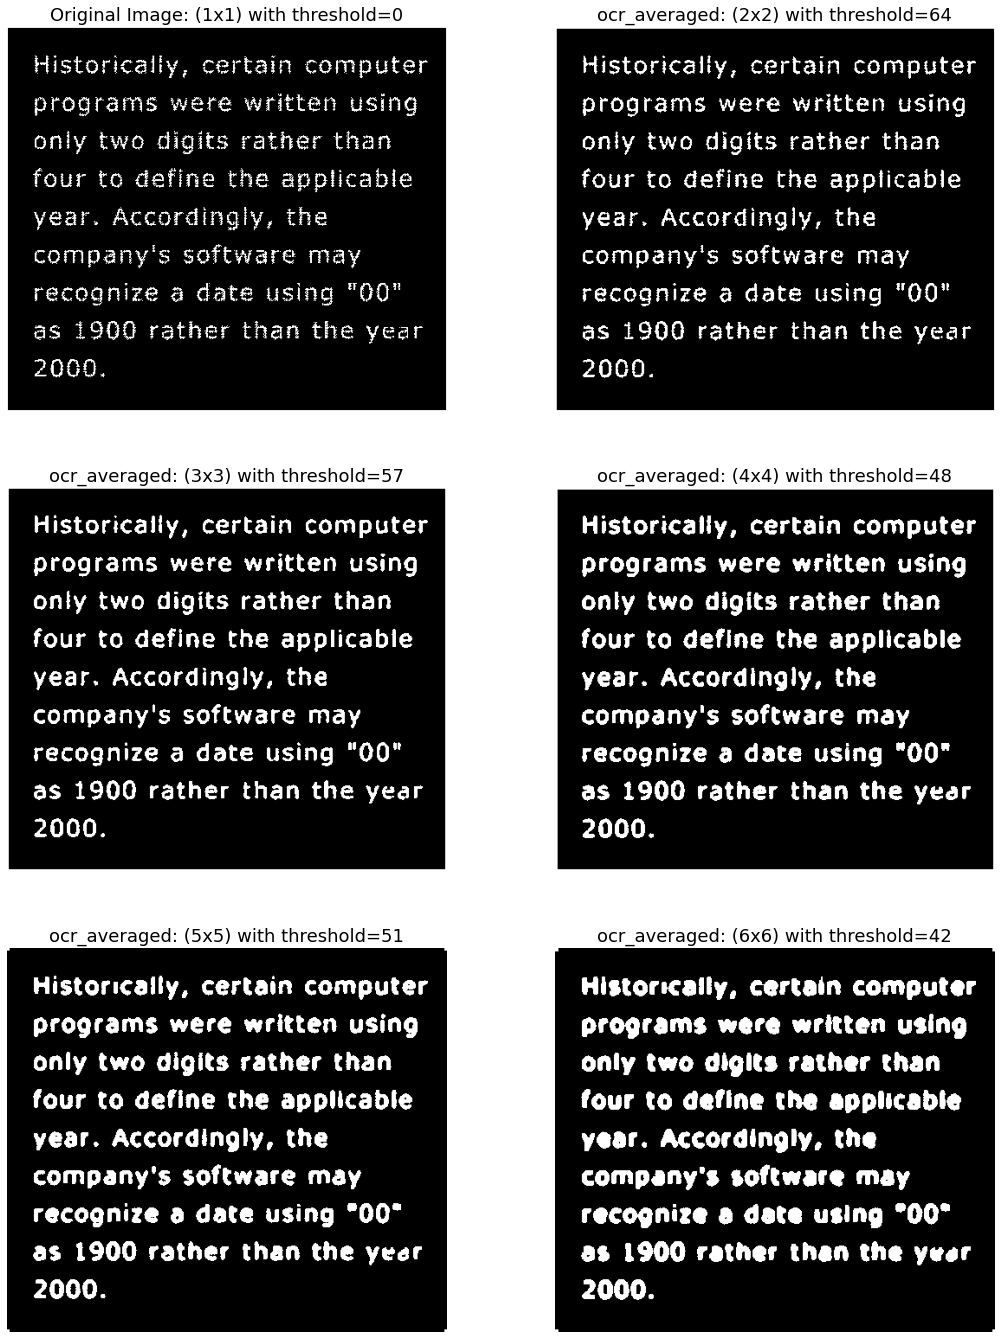

In [22]:
# şimdi hepsini bir fonksiyon altında toparlayalım
def soru3(number_of_kernels):
    N = number_of_kernels
    assert N>0, "Kernel boyutu sıfırdan büyük olmalı!"
    R = int(np.ceil(N/2))  # grafik gösterimdeki satır sayısı
    
    plt.figure(figsize=(18, 8*R))
    for k in range(1, N+1):
        # average filter:
        ocr_averaged = cv2.filter2D(src=ocr, ddepth=-1, kernel=average_function(k))
        # Otsu thresholding:
        ret, ocr_new = cv2.threshold(src=ocr_averaged,
                                     thresh=127,
                                     maxval=255,
                                     type=cv2.THRESH_OTSU)

        plt.subplot(R,2,k)
        if k == 1:
            plt.title(f"Original Image: ({k}x{k}) with threshold={int(ret)}", size=18)
        else:
            plt.title(f"ocr_averaged: ({k}x{k}) with threshold={int(ret)}", size=18)            
        plt.imshow(ocr_new, cmap="binary_r")
        plt.axis("off")
    plt.show()
    return None

# 6 farklı averaging kernel'i Otsu methodu üzerinde deneyelim:
soru3(6)

Okunabilirliği ve onarımı en yüksek resmin, Otsu threshold'unun 48 olarak hesaplandığı **(4x4)** averaging kernel olduğu görülmektedir. (3x3) kernel'i de yine oldukça başarılı bir performans sergilemektedir.

---
***Referances & Tools***<br>
* OpenCV: [cv2.calcHist()](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a)
* Wikipedia: [Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization)
* OpenCV: [Histogram Equalization](https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html)
* OpenCV: [Smoothing Images](https://docs.opencv.org/4.5.2/d4/d13/tutorial_py_filtering.html)<br>
* OpenCV: [cv2.filter2D()](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)
* OpenCV: [Image Thresholding](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)<br>